In [22]:
import time
import glob,random
import datetime
import os
import subprocess
import shlex
import gc,sys, traceback
import pandas as pd
import collections
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble, metrics 
import gc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from collections import Counter

parent_folder_name = "../simulation_result/"
folder_list=glob.glob(parent_folder_name+"*")
#print(folder_list)

all_value_list=[]
count=0
for x in folder_list:
    if ".png" not in x:
        start_index = x.rfind("/")
        end_index = x.rfind(".txt")
        model_name = x[start_index+1:end_index]
        print(model_name)
        with open(x,"r+") as in_file:
            for line in in_file:
                if len(line.strip())>0:
#                    count+=1
                    if "Threshold" in line:
                        all_value_list.append(line)
                    if "TP, FP, TN, FN" in line:
                        all_value_list.append(line)
        
        fp_map={}
        tp_map={}
        fp_count_map={}
        tp_count_map={}

        for x in range(len(all_value_list)):
            if "Threshold" in all_value_list[x]:
                parts = all_value_list[x].split(" ")
                threshold_value = float(parts[1].strip())

                value_parts = all_value_list[x+1].split(" ")
                tp = int(value_parts[5].strip())
                fp = int(value_parts[6].strip())
                tn = int(value_parts[7].strip())
                fn = int(value_parts[8].strip())

                if(tp+fn!=0):
                    recall = tp/(tp+fn)

                    if threshold_value not in tp_map:
                        tp_map[threshold_value] = recall
                    else:
                        prev_value = tp_map[threshold_value]
                        tp_map[threshold_value] = prev_value + recall

                    if threshold_value not in tp_count_map:
                        tp_count_map[threshold_value] = 1
                    else:
                        prev_value = tp_count_map[threshold_value]
                        tp_count_map[threshold_value] = prev_value + 1



                if(tn+fp!=0):
                    extra = fp/(tn+fp)

                    if threshold_value not in fp_map:
                        fp_map[threshold_value] = extra
                    else:
                        prev_value = fp_map[threshold_value]
                        fp_map[threshold_value] = prev_value + extra

                    if threshold_value not in fp_count_map:
                        fp_count_map[threshold_value] = 1
                    else:
                        prev_value = fp_count_map[threshold_value]
                        fp_count_map[threshold_value] = prev_value + 1
                
                

                
                
                
                

ST8000NM0055
ST8000DM002
ST12000NM0007
ST4000DM000


In [5]:
fp_map={}
tp_map={}
fp_count_map={}
tp_count_map={}

for x in range(len(all_value_list)):
    if "Threshold" in all_value_list[x]:
        parts = all_value_list[x].split(" ")
        threshold_value = float(parts[1].strip())
        
        value_parts = all_value_list[x+1].split(" ")
        tp = int(value_parts[5].strip())
        fp = int(value_parts[6].strip())
        tn = int(value_parts[7].strip())
        fn = int(value_parts[8].strip())
        
        if(tp+fn!=0):
            recall = tp/(tp+fn)
            
            if threshold_value not in tp_map:
                tp_map[threshold_value] = recall
            else:
                prev_value = tp_map[threshold_value]
                tp_map[threshold_value] = prev_value + recall
            
            if threshold_value not in tp_count_map:
                tp_count_map[threshold_value] = 1
            else:
                prev_value = tp_count_map[threshold_value]
                tp_count_map[threshold_value] = prev_value + 1
                
                
        
        if(tn+fp!=0):
            extra = fp/(tn+fp)
            
            if threshold_value not in fp_map:
                fp_map[threshold_value] = extra
            else:
                prev_value = fp_map[threshold_value]
                fp_map[threshold_value] = prev_value + extra
            
            if threshold_value not in fp_count_map:
                fp_count_map[threshold_value] = 1
            else:
                prev_value = fp_count_map[threshold_value]
                fp_count_map[threshold_value] = prev_value + 1
            


        
        

1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921
1685921


In [6]:
x_values = []
fp_values = []
for x in fp_count_map.keys():
    x_values.append(x)
    fp_values.append(fp_map[x]/fp_count_map[x])
#     print(fp_map[x]/fp_count_map[x])
        
print(fp_values)

0.07541972044166384
0.10630677945494402
0.14904322142108375
0.20533372017701707
0.2714894652783578
0.35778071119852445
0.46960363364649726
0.6035646652074946
0.7445994886222449
0.8926509601918474
0.9243504160523782
0.9542458099698774
0.9778890880983595
0.9931161746375545
1.0
[0.07541972044166384, 0.10630677945494402, 0.14904322142108375, 0.20533372017701707, 0.2714894652783578, 0.35778071119852445, 0.46960363364649726, 0.6035646652074946, 0.7445994886222449, 0.8926509601918474, 0.9243504160523782, 0.9542458099698774, 0.9778890880983595, 0.9931161746375545, 1.0]


In [7]:
tp_values = []
for x in tp_count_map.keys():
    tp_values.append(tp_map[x]/tp_count_map[x])
    print(tp_map[x]/tp_count_map[x])
        
print(tp_values)

0.8307439104674128
0.8496379196840026
0.8676102699144174
0.8759052007899935
0.8938117182356814
0.904147465437788
0.923963133640553
0.9446346280447663
0.9543778801843318
0.9906517445687952
1.0
1.0
1.0
1.0
1.0
[0.8307439104674128, 0.8496379196840026, 0.8676102699144174, 0.8759052007899935, 0.8938117182356814, 0.904147465437788, 0.923963133640553, 0.9446346280447663, 0.9543778801843318, 0.9906517445687952, 1.0, 1.0, 1.0, 1.0, 1.0]


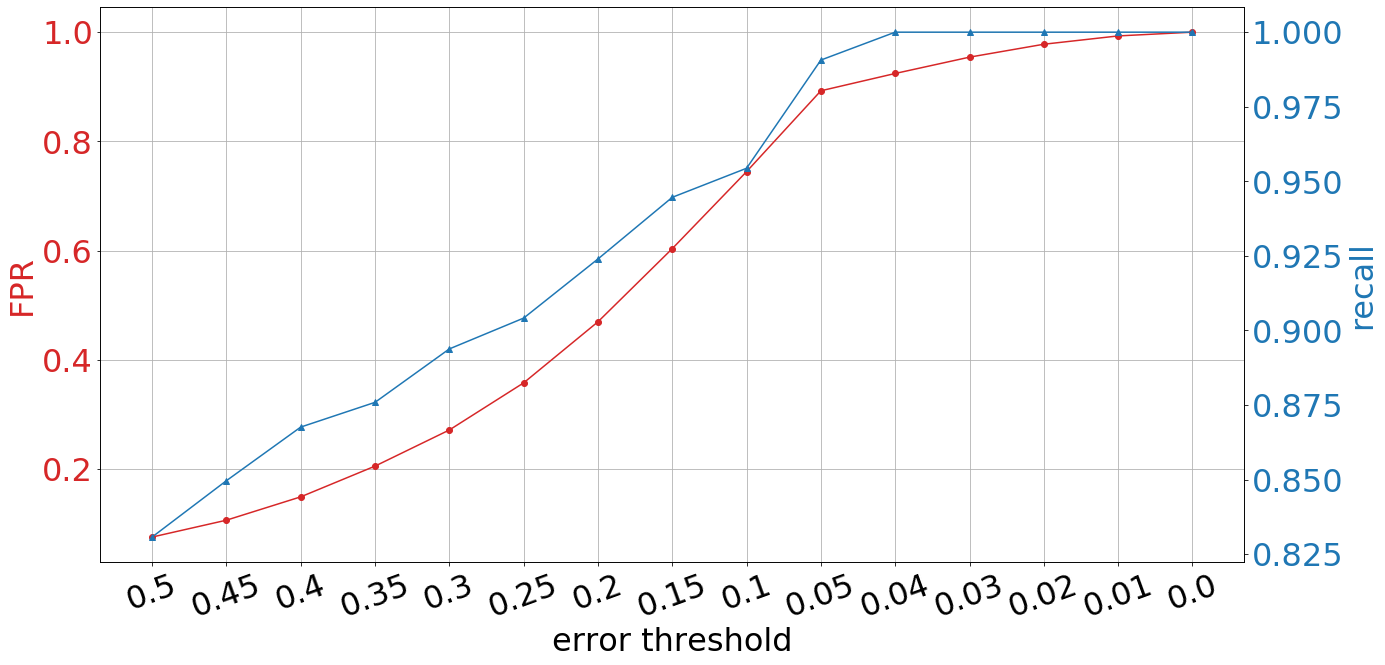

In [20]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({'font.size': 32})
x = np.arange(len(x_values))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('error threshold')
ax1.set_ylabel('FPR', color=color)
ax1.plot(x, fp_values, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(x_values, rotation=20)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('recall', color=color)  # we already handled the x-label with ax1
ax2.plot(x, tp_values, marker='^', color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig("../simulation_result/"+model_name".png")
plt.show()









# fig, ax = plt.subplots()
# color = 'tab:red'
# ax.plot(x,fp_values, marker='o', color=color, label="fp")
# color = 'tab:blue'
# ax.plot(x,tp_values, marker='^', color=color, label="Recall")
# ax.set(ylabel='Recall', xlabel='Threshold')
# ax.set_xticks(x)
# ax.set_xticklabels(x_values, rotation=20)
# ax.grid()
# ax.legend()
# fig.tight_layout()
# # plt.savefig("../recall_vallues_with_undersampling.pdf")
# plt.show()
